# Pre-requisite

Use runtime version **2025.07** Python 3

# Using Pandas AI for Exploratory Data Analysis

In this notebook, we will show how to create a semantic layer on a CSV file.
The semantic layer works as a bridge between the raw data and the natural language layer.

### Why use a Semantic Layer?
- Adds context and meaning to data columns
- Makes it easier for the large language model to understand context
- Set once, use across multiple sessions

In [1]:
!pip install pandasai
!pip install pandasai-litellm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 118.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.7/279.7 kB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 68.0 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.95.1
    Uninstalling openai-1.95.1:
      Successfully uninstalled openai-1.95.1


## Import PandasAI

In [2]:
import pandasai as pai

## Read raw data

For this example, we will use a small dataset of heart disease patients from [Kaggle](https://www.kaggle.com/datasets/arezaei81/heartcsv).

In [3]:
# Load the heart disease dataset
file_df = pai.read_csv("heart.csv")

# Display the first few rows
file_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Create the Semantic Layer

Requirements for the semantic layer:
- `path`: Must be in format 'organization/dataset'
- `name`: A descriptive name for the dataset
-  `df`: A dataframe
- `description`: Brief overview of the dataset
- `columns`: List of dictionaries with format:
  ```python
  {
      "name": "column_name",
      "type": "column_type",  # string, number, date, datetime
      "description": "column_description"
  }
  ```

In [5]:
dataset = pai.create(path="organization/heart",
    description="Heart Disease Dataset",
    df = file_df,
    columns=[
        {
            "name": "Age",
            "type": "integer",
            "description": "Age of the patient in years"
        },
        {
            "name": "Sex",
            "type": "string",
            "description": "Gender of the patient (M: Male, F: Female)"
        },
        {
            "name": "ChestPainType",
            "type": "string",
            "description": "Type of chest pain (ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic, TA: Typical Angina)"
        },
        {
            "name": "RestingBP",
            "type": "integer",
            "description": "Resting blood pressure in mm Hg"
        },
        {
            "name": "Cholesterol",
            "type": "integer",
            "description": "Serum cholesterol in mg/dl"
        },
        {
            "name": "FastingBS",
            "type": "integer",
            "description": "Fasting blood sugar (1: if FastingBS > 120 mg/dl, 0: otherwise)"
        },
        {
            "name": "RestingECG",
            "type": "string",
            "description": "Resting electrocardiogram results (Normal, ST: having ST-T wave abnormality, LVH: showing probable or definite left ventricular hypertrophy)"
        },
        {
            "name": "MaxHR",
            "type": "integer",
            "description": "Maximum heart rate achieved"
        },
        {
            "name": "ExerciseAngina",
            "type": "string",
            "description": "Exercise-induced angina (Y: Yes, N: No)"
        },
        {
            "name": "Oldpeak",
            "type": "float",
            "description": "ST depression induced by exercise relative to rest"
        },
        {
            "name": "ST_Slope",
            "type": "string",
            "description": "Slope of the peak exercise ST segment (Up, Flat, Down)"
        },
        {
            "name": "HeartDisease",
            "type": "integer",
            "description": "Target variable - Heart disease presence (1: heart disease, 0: normal)"
        }
    ])

Dataset saved successfully to path: organization/heart


## Load Semantic Dataframe

Once you have saved the dataframe with its semantic layer, you can load it in any session using the `load()` method. This allows you to:
- Maintain data context across sessions
- Ask questions about your data in natural language
- Generate more accurate analysis and visualizations

In [6]:
# Load the semantically enhanced dataset
df = pai.load("organization/heart")

Dataset loaded successfully.


## Chat with your dataframe

You can now ask questions about your data in natural language to your dataframe using the `chat()` method. PandasAI can be used with several LLMs. For the purpose of this example, we are using LiteLLM.

In [7]:
from getpass import getpass

In [8]:
openai_api_key = getpass("OpenAI API Key: ")

OpenAI API Key: ··········


In [9]:
from pandasai_litellm.litellm import LiteLLM

# Initialize LiteLLM with your OpenAI model
llm = LiteLLM(model="gpt-4.1-mini", api_key=openai_api_key)

# Configure PandasAI to use this LLM
pai.config.set({
    "llm": llm
})

-0.09528177118121911


In [12]:
response = df.chat("What is the correlation between age and cholesterol?")

print(response)

-0.09528177118121911


In [10]:
chart_response = df.chat("Create a scatter plot of age vs Cholesterol")
chart_response.save("scatter_plot.png")

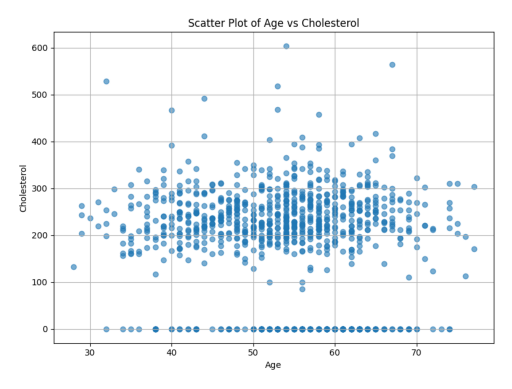

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
img = mpimg.imread('scatter_plot.png')

# Display the image
plt.imshow(img)
plt.axis('off') # Hide axes
plt.show()


In [13]:
response = df.chat("Is average of maximum heart rate between male and femae same or different. Do a statistical test. ")

print(response)

The average maximum heart rate between males and females is statistically different. (p-value=0.0000)
